<a href="https://colab.research.google.com/github/ThivankaD/diabetes_Predictions_/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


import tensorflow as tf

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


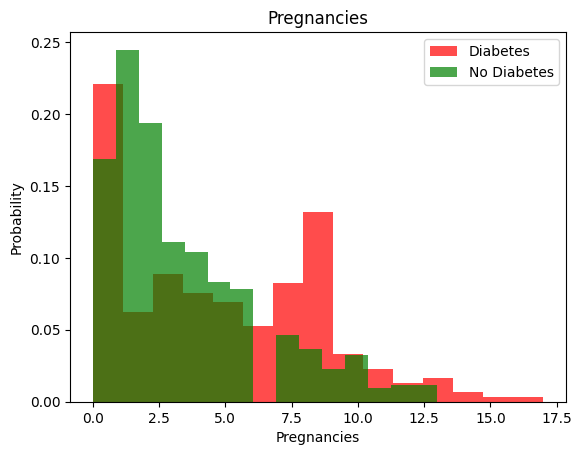

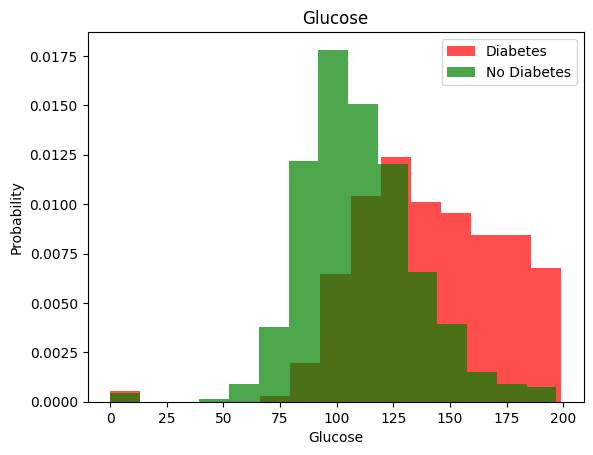

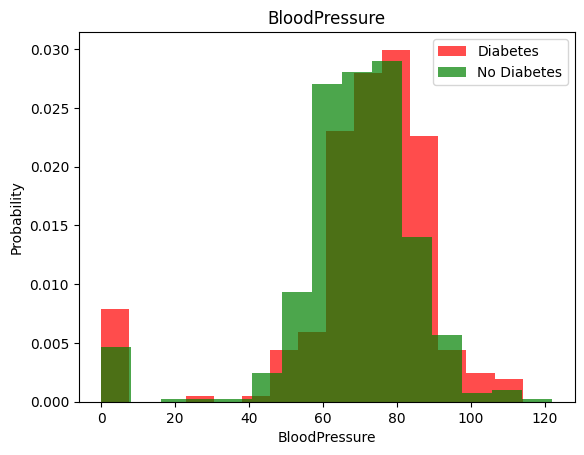

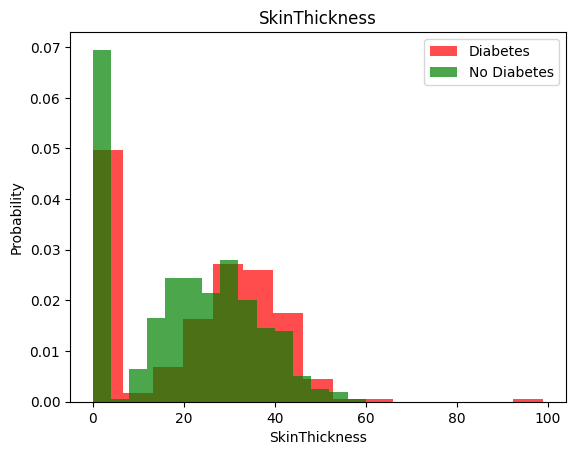

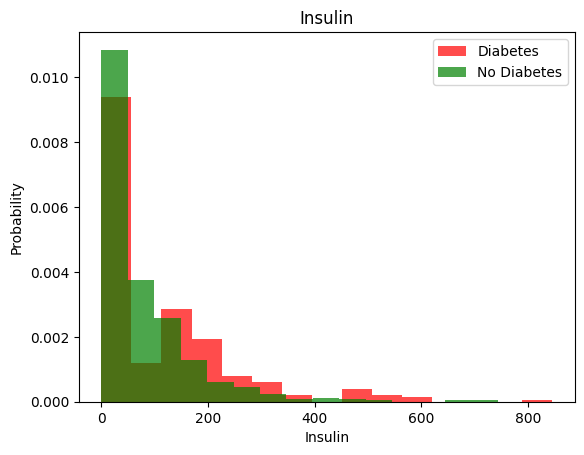

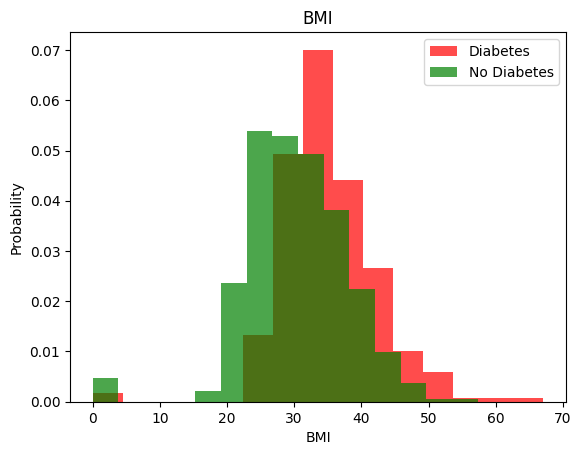

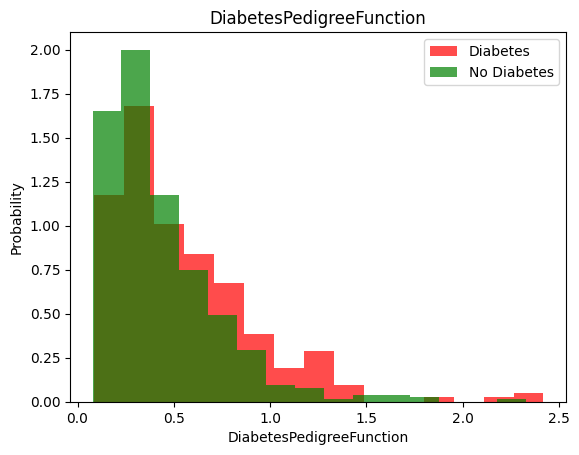

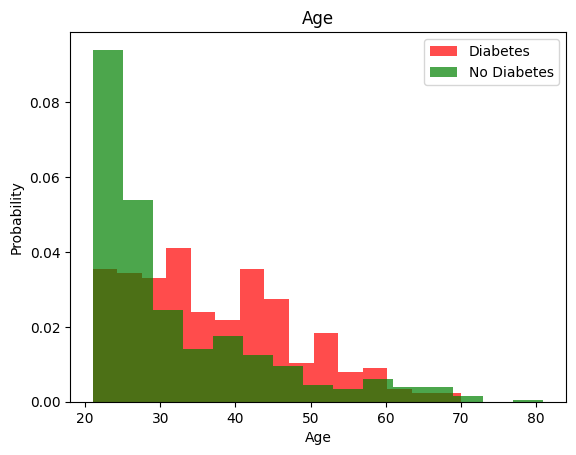

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='red',label="Diabetes",alpha=0.7,density=True,bins=15)
  plt.hist(df[df['Outcome']==0][label],color='green',label="No Diabetes",alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
X = df[df.columns[:-1]].values
y= df[df.columns[-1]].values


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
#data = np.hstack((X,np.reshape(y,(-1,1))))

In [ ]:
over=RandomOverSampler()
X,y=over.fit_resample(X,y)

In [ ]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.4,random_state=0)
X_valid,X_test,y_valid,y_test = train_test_split(X_temp,y_temp,train_size=0.5,random_state=0)

In [ ]:
model =tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),#if  x<=0 ---> 0, X >0---->x
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(X_train,y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4574 - loss: 0.7114  


[0.7165654897689819, 0.46166667342185974]

In [ ]:
model.evaluate(X_valid,y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4479 - loss: 0.7192 


[0.7164894342422485, 0.44999998807907104]

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=16,validation_data=(X_valid,y_valid))#epocs-->how many times our dataset train

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4826 - loss: 0.7118 - val_accuracy: 0.5750 - val_loss: 0.6690
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6613 - loss: 0.6453 - val_accuracy: 0.7150 - val_loss: 0.6303
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7161 - loss: 0.6252 - val_accuracy: 0.7200 - val_loss: 0.5923
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7318 - loss: 0.5939 - val_accuracy: 0.7400 - val_loss: 0.5563
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7423 - loss: 0.5503 - val_accuracy: 0.7350 - val_loss: 0.5262
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7228 - loss: 0.5487 - val_accuracy: 0.7350 - val_loss: 0.5075
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7690 - loss: 0.4925 - val_accuracy: 0.7650 - val_loss: 0.4965
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7271 - loss: 0.5325 - val_accuracy: 0.7750 - val_loss:

In [ ]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8123 - loss: 0.4603 


[0.48738613724708557, 0.8050000071525574]